**Importing libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import sklearn
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.utils import shuffle
from sklearn import svm
import csv
import os 
import cv2

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras import regularizers

In [2]:
# Dataset name
dataset_name = 'Emotion Original Dataset/'

train_data_dir = dataset_name + '/train/'

# Set up sampling rate
sample_rate = 1

**Visualisation for Class Sad**

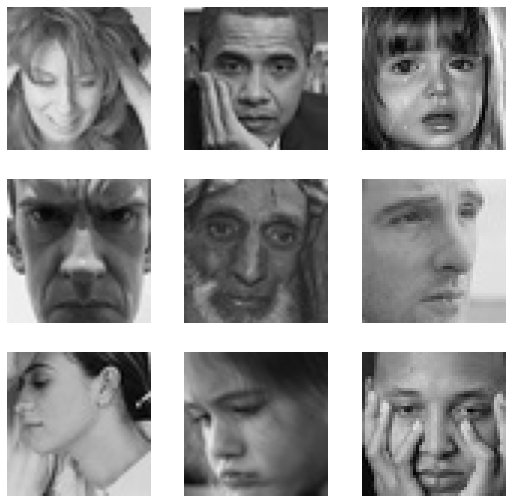

In [4]:
pltsize=3
col_images = 3
row_images = 3
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(load_img(train_data_dir+"sad/"+os.listdir(train_data_dir + "sad/")[i]))
    #plt.title((str(os.listdir(train_data_dir + "sad/")[i])))

**Visualisation for Class Happy**

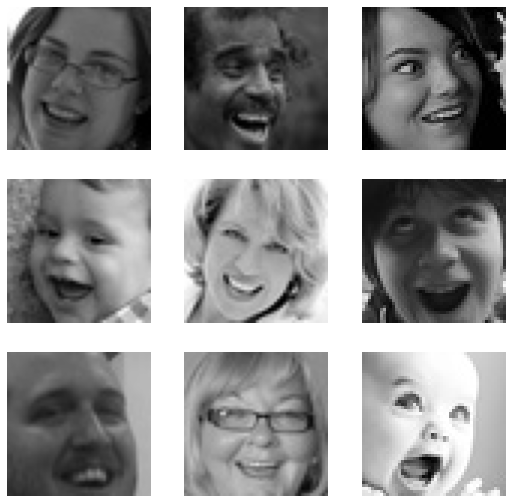

In [4]:
pltsize=3
col_images = 3
row_images = 3
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(load_img(train_data_dir+"happy/"+os.listdir(train_data_dir + "happy/")[i]))
    #plt.title((str(os.listdir(train_data_dir + "happy/")[i])))

**Visualisation for class Angry**

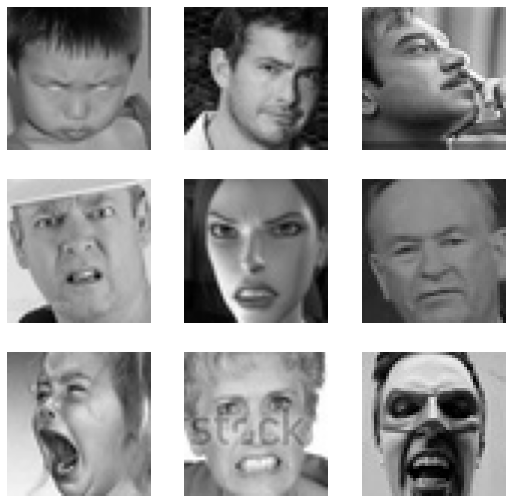

In [5]:
pltsize=3
col_images = 3
row_images = 3
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(load_img(train_data_dir+"angry/"+os.listdir(train_data_dir + "angry/")[i]))
    #plt.title((str(os.listdir(train_data_dir + "angry/")[i])))

**Visualisation for Class Surprise**

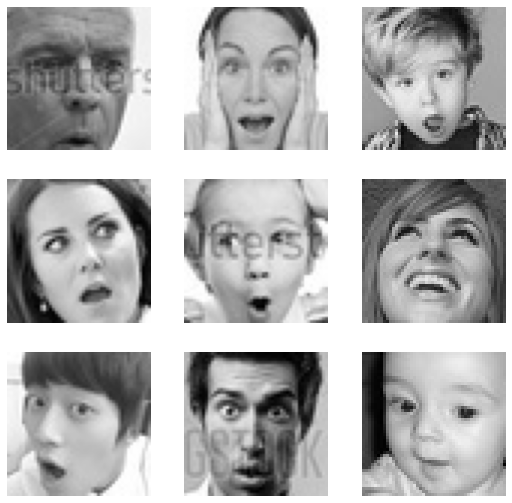

In [6]:
pltsize=3
col_images = 3
row_images = 3
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(load_img(train_data_dir+"surprise/"+os.listdir(train_data_dir + "surprise/")[i]))

**Visualisation for Class Disgust**

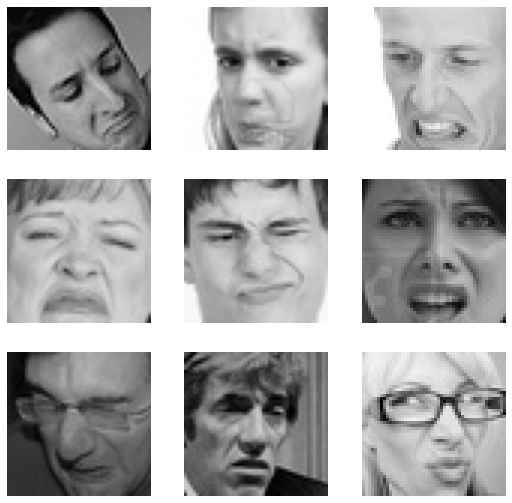

In [7]:
pltsize=3
col_images = 3
row_images = 3
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(load_img(train_data_dir+"disgust/"+os.listdir(train_data_dir + "disgust/")[i]))
    

**Visualisation for class fear**

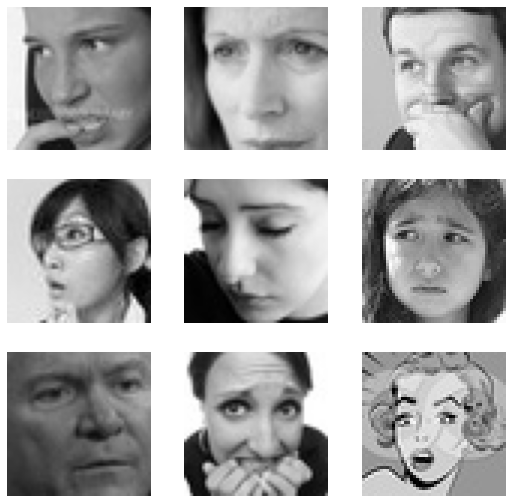

In [8]:
pltsize=3
col_images = 3
row_images = 3
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(load_img(train_data_dir+"fear/"+os.listdir(train_data_dir + "fear/")[i]))
    #plt.title((str(os.listdir(train_data_dir + "fear/")[i])))

In [3]:
#Traversing through sub folders
training_class_folders = [i for i in os.listdir(train_data_dir)] 
num_classes = len(training_class_folders)

# desired dimensions of our images.
img_width, img_height = 48,48

# Set input shape
input_shape = (img_width, img_height,3)
# Initialise arrays for data storage
X_train = np.ndarray((0, input_shape[0], input_shape[1], input_shape[2]), dtype=np.float)
y_train= np.ndarray(0, dtype=np.str)

**Processing the training class folders**

In [4]:
# Iterate through the class folders
for i, image_cls in enumerate(training_class_folders):
    
    print('Class {}'.format(image_cls))
    image_class_folder = train_data_dir + image_cls + "/"
    
    # generate filenames from the data folder and do sampling
    image_filenames = [image_class_folder+i for i in os.listdir(image_class_folder)] 
    image_filenames = random.sample(image_filenames, int(len(image_filenames)*sample_rate))

    # Create a data array for image data
    count = len(image_filenames)
    X_data_part = np.ndarray((count, input_shape[0], input_shape[1], input_shape[2]), dtype=np.float)

    # Iterate through the filenames and for each one load the image, resize and normalise
    for i, image_file in enumerate(image_filenames):

        # Low the images and resize them
        image = cv2.imread(image_file, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (img_height, img_width), interpolation=cv2.INTER_CUBIC)        
        image = image[:,:,[2,1,0]]
        
        # Add image data to data array and normalise
        X_data_part[i] = image
        X_data_part[i] = X_data_part[i]/255
        
        # Add label to label array
        y_train = np.append(y_train, image_cls)#class 
        
    print('Processed {} of {} for class {} '.format(i + 1, count, image_cls))
    
    # Append the part to the overall data array
    X_train = np.append(X_train, X_data_part, axis=0)
    
print("Data shape: {}".format(X_train.shape))

Class angry
Processed 3994 of 3994 for class angry 
Class disgust
Processed 436 of 436 for class disgust 
Class fear
Processed 4095 of 4095 for class fear 
Class happy
Processed 7211 of 7211 for class happy 
Class neutral
Processed 4960 of 4960 for class neutral 
Class sad
Processed 4826 of 4826 for class sad 
Class surprise
Processed 3165 of 3165 for class surprise 
Data shape: (28687, 48, 48, 3)


In [5]:
print(X_train.shape,y_train.shape)

(28687, 48, 48, 3) (28687,)


**Processing the test class folders**

In [6]:
X_test = np.ndarray((0, input_shape[0], input_shape[1], input_shape[2]), dtype=np.float)
y_test= np.ndarray(0, dtype=np.str)
test_data_dir = dataset_name + '/test/'
test_class_folders = [i for i in os.listdir(test_data_dir)] 
# Iterate through the class folders
for i, image_cls in enumerate(test_class_folders):
    
    print('Class {}'.format(image_cls))
    image_class_folder = test_data_dir + image_cls + "/"
    
    # generate filenames from the data folder and do sampling
    image_filenames = [image_class_folder+i for i in os.listdir(image_class_folder)] 
    image_filenames = random.sample(image_filenames, int(len(image_filenames)*sample_rate))

    # Create a data array for image data
    count = len(image_filenames)
    X_data_part = np.ndarray((count, input_shape[0], input_shape[1], input_shape[2]), dtype=np.float)

    # Iterate throuigh the filenames and for each one load the image, resize and normalise
    for i, image_file in enumerate(image_filenames):

        # Low the images and resize them
        image = cv2.imread(image_file, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (img_height, img_width), interpolation=cv2.INTER_CUBIC)        
        image = image[:,:,[2,1,0]]
        
        # Add image data to data array and normalise
        X_data_part[i] = image
        X_data_part[i] = X_data_part[i]/255
        
        # Add label to label array
        y_test = np.append(y_test, image_cls)#class 
        
    print('Processed {} of {} for class {} '.format(i + 1, count, image_cls))
    
    # Append the part to the overall data array
    X_test = np.append(X_test, X_data_part, axis=0)
    
print("Data shape: {}".format(X_test.shape))

Class angry
Processed 958 of 958 for class angry 
Class disgust
Processed 111 of 111 for class disgust 
Class fear
Processed 1024 of 1024 for class fear 
Class happy
Processed 1773 of 1773 for class happy 
Class neutral
Processed 1231 of 1231 for class neutral 
Class sad
Processed 1245 of 1245 for class sad 
Class surprise
Processed 830 of 830 for class surprise 
Data shape: (7172, 48, 48, 3)


In [7]:
print(X_test.shape,y_test.shape)

(7172, 48, 48, 3) (7172,)


Append train and test data together

In [8]:
X = np.ndarray((0, input_shape[0], input_shape[1], input_shape[2]), dtype=np.float)
X = np.append(X,X_train,axis=0)

In [9]:
X = np.append(X,X_test,axis=0)

In [10]:
X.shape

(35859, 48, 48, 3)

In [11]:
y= np.ndarray(0, dtype=np.str)
y = np.append(y, y_train)
y.shape

(28687,)

In [12]:
y = np.append(y, y_test)
y.shape

(35859,)

In [13]:
# Perfrom split to train, validation, test
X_train_plus_valid, X_test, y_train_plus_valid, y_test = train_test_split(X, y, random_state=0, test_size = 0.25, train_size = 0.75)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_plus_valid, y_train_plus_valid, random_state=0, test_size = 0.30, train_size = 0.70)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(18825, 48, 48, 3)
(18825,)
(8069, 48, 48, 3)
(8069,)
(8965, 48, 48, 3)
(8965,)


In [15]:
# Convert class vectors to binary class matrices.
y_train_encoder = sklearn.preprocessing.LabelEncoder()
y_train_num = y_train_encoder.fit_transform(y_train)
y_train_wide = to_categorical(y_train_num, num_classes)

y_train_plus_valid_num = y_train_encoder.fit_transform(y_train_plus_valid)
y_train_plus_valid_wide = to_categorical(y_train_plus_valid_num, num_classes)

y_valid_num = y_train_encoder.fit_transform(y_valid)
y_valid_wide = to_categorical(y_valid_num, num_classes)

y_test_num = y_train_encoder.fit_transform(y_test)
y_test_wide = to_categorical(y_test_num, num_classes)

Record the number to label mapping 

In [16]:
classes_num_label = dict()

for idx, lbl in enumerate(y_train_encoder.classes_):
    classes_num_label[idx] = lbl

Print a few randomly sampled example images.

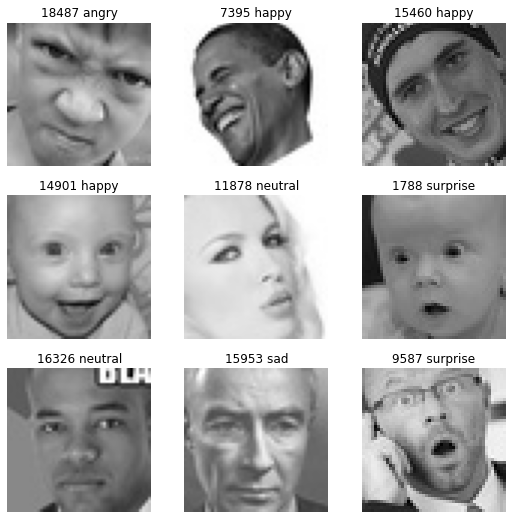

In [17]:
import PIL
pltsize=3
row_images = 3
col_images = 3
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    i_rand = random.randint(0, X_train.shape[0])
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(PIL.Image.fromarray(((X_train[i_rand]) * 255).astype(np.uint8)))
    plt.title((str(i_rand) + " " + y_train[i_rand]))

Imbalance handling

In [18]:
#Reshaping to 2d for handling imbalance in train set
newshape=X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_new=X_train.reshape(len(X_train),newshape)

In [19]:
X_new.shape

(18825, 6912)

In [20]:
y_train.shape

(18825,)

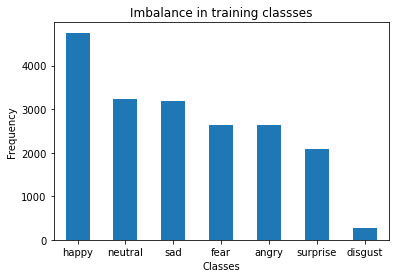

In [21]:
data = pd.DataFrame(data={'Classes':y_train})
data['Classes'].value_counts().plot(kind='bar',rot=0)
plt.title('Imbalance in training classses')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [22]:
from imblearn.over_sampling import RandomOverSampler
r =  RandomOverSampler()
X_train_res,y_train_res=r.fit_resample(X_new, y_train)

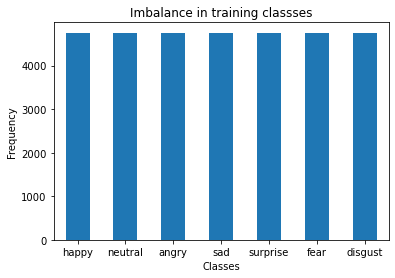

In [23]:
data = pd.DataFrame(data={'Classes':y_train_res})
data['Classes'].value_counts().plot(kind='bar',rot=0)
plt.title('Imbalance in training classses')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [24]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({'happy': 4755, 'neutral': 3243, 'sad': 3195, 'fear': 2635, 'angry': 2625, 'surprise': 2096, 'disgust': 276})
Resampled dataset shape Counter({'neutral': 4755, 'surprise': 4755, 'happy': 4755, 'sad': 4755, 'fear': 4755, 'angry': 4755, 'disgust': 4755})


In [25]:
#Reshaping back to input for neural network
X_train=X_train_res.reshape(len(X_train_res),img_width, img_height,3)

In [26]:
y_train_num = y_train_encoder.fit_transform(y_train_res)
y_train_wide = to_categorical(y_train_num, num_classes)

**Trial 1**

Added droput after hidden layer

In [28]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))#input shape is shape of image
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) #we get a fully connected layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))#Output layer
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',  
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 21, 21, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0

In [29]:
batch_size = 128
epochs = 60
best_weights_filepath = './EmotionModel.hdf5'
mcp = ModelCheckpoint(best_weights_filepath, monitor="val_accuracy",save_best_only=True, save_weights_only=False,mode='max')

history = model.fit(X_train, y_train_wide,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid, y_valid_wide),
          callbacks=[mcp])

model.load_weights(best_weights_filepath)

Epoch 1/60
278/278 [==============================] - 26s 93ms/step - loss: 1.9465 - accuracy: 0.1552 - val_loss: 1.9438 - val_accuracy: 0.1522
Epoch 2/60
278/278 [==============================] - 26s 94ms/step - loss: 1.9333 - accuracy: 0.1787 - val_loss: 1.9385 - val_accuracy: 0.1599
Epoch 3/60
278/278 [==============================] - 25s 90ms/step - loss: 1.8902 - accuracy: 0.2243 - val_loss: 1.8805 - val_accuracy: 0.2304
Epoch 4/60
278/278 [==============================] - 25s 89ms/step - loss: 1.8206 - accuracy: 0.2758 - val_loss: 1.8163 - val_accuracy: 0.2657
Epoch 5/60
278/278 [==============================] - 25s 90ms/step - loss: 1.7655 - accuracy: 0.3099 - val_loss: 1.7628 - val_accuracy: 0.3073
Epoch 6/60
278/278 [==============================] - 25s 90ms/step - loss: 1.7176 - accuracy: 0.3374 - val_loss: 1.6962 - val_accuracy: 0.3477
Epoch 7/60
278/278 [==============================] - 25s 90ms/step - loss: 1.6820 - accuracy: 0.3566 - val_loss: 1.6591 - val_accuracy:

278/278 [==============================] - 25s 90ms/step - loss: 0.9322 - accuracy: 0.6515 - val_loss: 1.2629 - val_accuracy: 0.5328
Epoch 58/60
278/278 [==============================] - 25s 90ms/step - loss: 0.9204 - accuracy: 0.6595 - val_loss: 1.2700 - val_accuracy: 0.5236
Epoch 59/60
278/278 [==============================] - 25s 90ms/step - loss: 0.9171 - accuracy: 0.6609 - val_loss: 1.2643 - val_accuracy: 0.5312
Epoch 60/60
278/278 [==============================] - 25s 91ms/step - loss: 0.9099 - accuracy: 0.6618 - val_loss: 1.2633 - val_accuracy: 0.5340


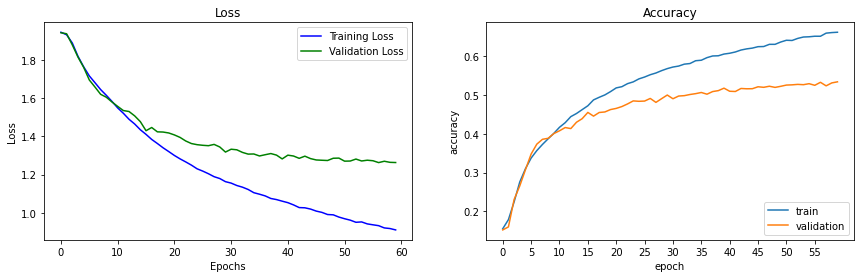

In [30]:
plt.subplots_adjust(left=None, bottom=None, right = 2, top=None, wspace=None, hspace=None)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(range(0,epochs)[0::5])
plt.legend(['train', 'validation'], loc='lower right')

In [31]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [32]:
predlabels = model.predict(X_test)
predlabels.argmax(axis=1)

array([4, 4, 5, ..., 0, 5, 3], dtype=int64)

In [33]:
emotions={0:'angry',1:'disgust',2:'fear',3:'happy',4:'neutral',5:'sad',6:'surprise'}

<ipython-input-34-3c0d90263ef5>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


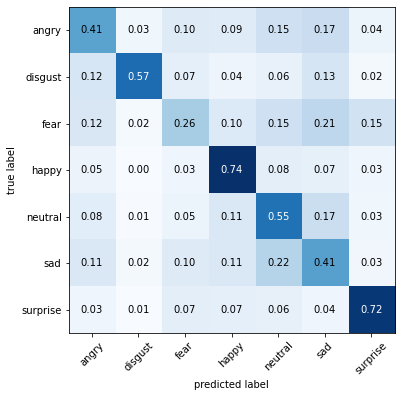

In [34]:
conf_mat = confusion_matrix(y_test_num, predlabels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(7, 6))
fig.show()

In [35]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Weighted Precision: {:.2f}'.format(precision_score(y_test_num, predlabels.argmax(axis=1), average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test_num, predlabels.argmax(axis=1), average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test_num, predlabels.argmax(axis=1), average='weighted')))

Weighted Precision: 0.52
Weighted Recall: 0.53
Weighted F1-score: 0.52


Model seems to overfit a lot

**Trial2**

Changed the number of neurons in hidden layer

In [29]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))#input shape is shape of image
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) #we get a fully connected layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))#Output layer
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',  
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 21, 21, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0

In [30]:
batch_size = 128
epochs = 60
best_weights_filepath = './EmotionModel.hdf5'
mcp = ModelCheckpoint(best_weights_filepath, monitor="val_accuracy",save_best_only=True, save_weights_only=False,mode='max')

history = model.fit(X_train, y_train_wide,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid, y_valid_wide),
          callbacks=[mcp])

model.load_weights(best_weights_filepath)

Epoch 1/60
278/278 [==============================] - 31s 110ms/step - loss: 1.9422 - accuracy: 0.1602 - val_loss: 1.9402 - val_accuracy: 0.1699
Epoch 2/60
278/278 [==============================] - 31s 110ms/step - loss: 1.8795 - accuracy: 0.2349 - val_loss: 1.8477 - val_accuracy: 0.2388
Epoch 3/60
278/278 [==============================] - 31s 112ms/step - loss: 1.7670 - accuracy: 0.3104 - val_loss: 1.7348 - val_accuracy: 0.3270
Epoch 4/60
278/278 [==============================] - 31s 110ms/step - loss: 1.6745 - accuracy: 0.3600 - val_loss: 1.6652 - val_accuracy: 0.3609
Epoch 5/60
278/278 [==============================] - 30s 110ms/step - loss: 1.6045 - accuracy: 0.3940 - val_loss: 1.6065 - val_accuracy: 0.3868
Epoch 6/60
278/278 [==============================] - 30s 109ms/step - loss: 1.5453 - accuracy: 0.4178 - val_loss: 1.5720 - val_accuracy: 0.4079
Epoch 7/60
278/278 [==============================] - 31s 111ms/step - loss: 1.4982 - accuracy: 0.4358 - val_loss: 1.4850 - val_ac

278/278 [==============================] - 31s 112ms/step - loss: 0.6612 - accuracy: 0.7566 - val_loss: 1.2772 - val_accuracy: 0.5598
Epoch 58/60
278/278 [==============================] - 31s 112ms/step - loss: 0.6537 - accuracy: 0.7620 - val_loss: 1.2865 - val_accuracy: 0.5589
Epoch 59/60
278/278 [==============================] - 31s 113ms/step - loss: 0.6453 - accuracy: 0.7640 - val_loss: 1.2840 - val_accuracy: 0.5595
Epoch 60/60
278/278 [==============================] - 31s 111ms/step - loss: 0.6329 - accuracy: 0.7708 - val_loss: 1.2934 - val_accuracy: 0.5587


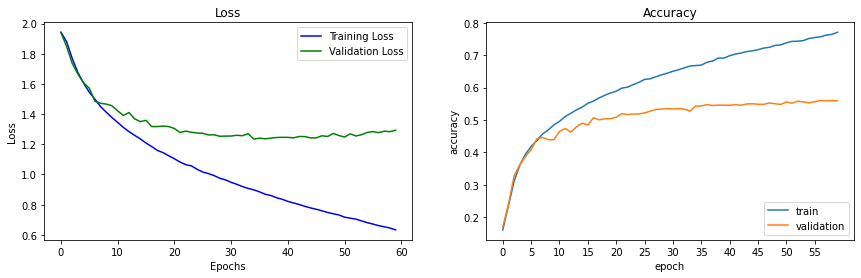

In [31]:
plt.subplots_adjust(left=None, bottom=None, right = 2, top=None, wspace=None, hspace=None)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(range(0,epochs)[0::5])
plt.legend(['train', 'validation'], loc='lower right')

In [32]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [33]:
predlabels = model.predict(X_test)
predlabels.argmax(axis=1)

array([4, 3, 5, ..., 6, 5, 3], dtype=int64)

In [34]:
emotions={0:'angry',1:'disgust',2:'fear',3:'happy',4:'neutral',5:'sad',6:'surprise'}

<ipython-input-35-3c0d90263ef5>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


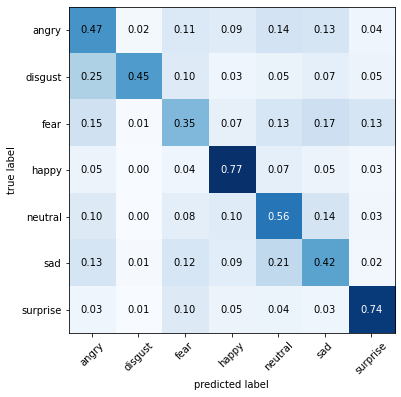

In [35]:
conf_mat = confusion_matrix(y_test_num, predlabels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(7, 6))
fig.show()

**Trail 3**

Added batch normalisation and kernal regularizers

In [29]:
model = Sequential()   
model.add(Conv2D(32, (3, 3), input_shape =input_shape))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))#Output layer
model.add(Activation('softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 44, 44, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0

In [31]:
batch_size = 128
epochs = 60

best_weights_filepath = './EmotionModel.hdf5'
mcp = ModelCheckpoint(best_weights_filepath, monitor="val_accuracy",save_best_only=True, save_weights_only=False,mode='max')

history = model.fit(X_train, y_train_wide,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid, y_valid_wide),
          callbacks=[mcp])

model.load_weights(best_weights_filepath)

Epoch 1/60
278/278 [==============================] - 113s 405ms/step - loss: 3.0990 - accuracy: 0.2379 - val_loss: 4.1930 - val_accuracy: 0.0390
Epoch 2/60
278/278 [==============================] - 113s 406ms/step - loss: 2.5734 - accuracy: 0.3343 - val_loss: 2.6610 - val_accuracy: 0.3348
Epoch 3/60
278/278 [==============================] - 113s 408ms/step - loss: 2.2716 - accuracy: 0.4015 - val_loss: 2.2618 - val_accuracy: 0.3935
Epoch 4/60
278/278 [==============================] - 113s 407ms/step - loss: 2.0354 - accuracy: 0.4549 - val_loss: 2.0341 - val_accuracy: 0.4413
Epoch 5/60
278/278 [==============================] - 115s 414ms/step - loss: 1.8473 - accuracy: 0.5057 - val_loss: 1.9295 - val_accuracy: 0.4820
Epoch 6/60
278/278 [==============================] - 113s 408ms/step - loss: 1.6958 - accuracy: 0.5408 - val_loss: 1.8199 - val_accuracy: 0.4885
Epoch 7/60
278/278 [==============================] - 113s 406ms/step - loss: 1.5702 - accuracy: 0.5726 - val_loss: 1.7846 -

Epoch 57/60
278/278 [==============================] - 114s 409ms/step - loss: 0.1641 - accuracy: 0.9637 - val_loss: 2.0471 - val_accuracy: 0.5674
Epoch 58/60
278/278 [==============================] - 114s 411ms/step - loss: 0.1586 - accuracy: 0.9654 - val_loss: 2.0638 - val_accuracy: 0.5668
Epoch 59/60
278/278 [==============================] - 114s 410ms/step - loss: 0.1596 - accuracy: 0.9644 - val_loss: 2.0568 - val_accuracy: 0.5646
Epoch 60/60
278/278 [==============================] - 114s 411ms/step - loss: 0.1551 - accuracy: 0.9656 - val_loss: 1.9831 - val_accuracy: 0.5736


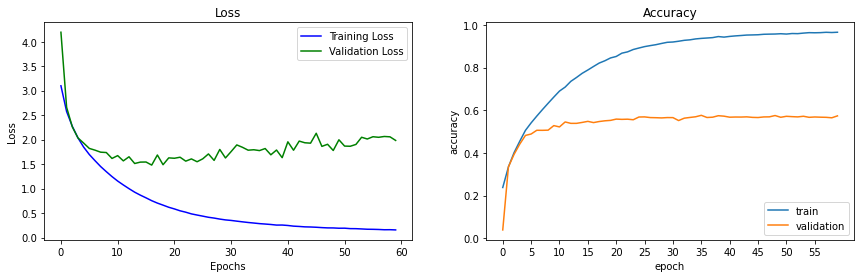

In [32]:
plt.subplots_adjust(left=None, bottom=None, right = 2, top=None, wspace=None, hspace=None)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(range(0,epochs)[0::5])
plt.legend(['train', 'validation'], loc='lower right')

In [33]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [34]:
predlabels = model.predict(X_test)
predlabels.argmax(axis=1)

array([4, 3, 5, ..., 4, 5, 4], dtype=int64)

In [35]:
emotions={0:'angry',1:'disgust',2:'fear',3:'happy',4:'neutral',5:'sad',6:'surprise'}

<ipython-input-36-3c0d90263ef5>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


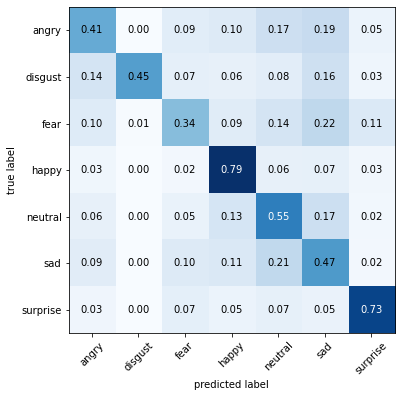

In [36]:
conf_mat = confusion_matrix(y_test_num, predlabels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(7, 6))
fig.show()